<a href="https://colab.research.google.com/github/d-egan/cs7gv1_Assignment-1/blob/main/CS7GV1_Assignment_1_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
if RunningInCOLAB:
  from google.colab.patches import cv2_imshow
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

Running on CoLab


In [9]:
def imshow(img):
  if RunningInCOLAB:
    cv2_imshow(img)
  else:
    cv2.imshow(img)

In [4]:
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/images/england-3735180_640.jpg')

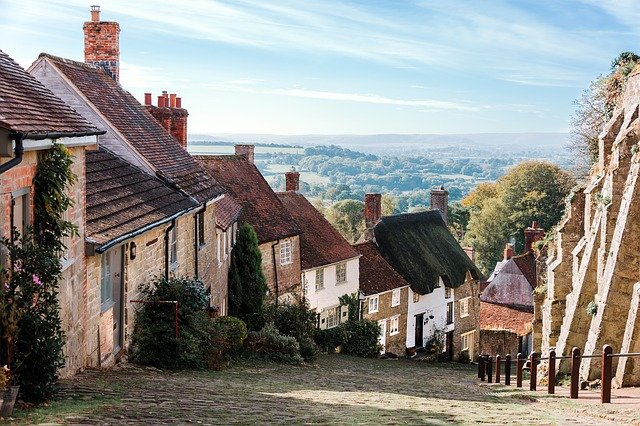

In [11]:
imshow(img)

In [12]:
# Took a few rows off my image so it was evenly divisible by 16
img = img[:416,:,:]
img.shape

(416, 640, 3)

In [13]:
y, x, d = img.shape
ys = y/16
xs = x/16
print(xs)
print(ys)
print(ys*xs)

40.0
26.0
1040.0


In [14]:
# Deconstruct image into patches
patches = []
for x in range(0, 40):
  for y in range(0, 26):
    yp = y * 16
    xp = x * 16
    patches.append(img[yp:yp+16,xp:xp+16, :])
patches = np.array(patches)

In [15]:
patches.shape

(1040, 16, 16, 3)

In [18]:
flat_patches = patches.reshape(-1, 16*16*3)
flat_patches.shape

(1040, 768)

In [19]:
flat_mean_vec = np.mean(flat_patches, axis=0)
print(flat_mean_vec.shape)
#plt.imshow(cv2.cvtColor(flat_mean_vec.reshape(16, 16, 3).astype('uint8'), cv2.COLOR_BGR2RGB), interpolation='none')
#imshow(flat_mean_vec.reshape((16, 16, 3)))

(768,)


In [20]:
centered_flat_patches = flat_patches - flat_mean_vec

In [21]:
# No need to devide by mean if just getting eigen stuff
C = np.dot(centered_flat_patches.T, centered_flat_patches)
C.shape

(768, 768)

## Deconstruction

Apparently getting the svd or eigenvectors should be same thing with a square matrix except you have to sort the eigenvectors but I also found eigenvectors were noisier when viewing the components.

In [22]:
from numpy import linalg as LA
U,S,V = LA.svd(C)

In [23]:
from numpy import linalg as LA
w, evs = LA.eig(C)
indices = w.argsort()[::-1]
print(evs.T[indices][0,:10])
print(evs.T[indices][0, :10].shape)
print(V[0, :10])
print(V[0, :10].shape)
#print(S)
evssorted = evs[indices]

[-0.03855464 -0.03520683 -0.028684   -0.03938787 -0.0360518  -0.02951975
 -0.03939885 -0.03605876 -0.02963316 -0.03974626]
(10,)
[-0.03855464 -0.03520683 -0.028684   -0.03938787 -0.0360518  -0.02951975
 -0.03939885 -0.03605876 -0.02963316 -0.03974626]
(10,)


In [24]:
print(V.shape)
print(evssorted.T.shape)
print(U.T.shape)

print(V[0,:10])
print(evssorted.T[0,:10])
print(U.T[0,:10])
if(np.equal(V, evssorted.T).all()):
  print("YES")
# False due to floating point error
print(np.equal(V[0,:10], evssorted.T[0,:10]))

(768, 768)
(768, 768)
(768, 768)
[-0.03855464 -0.03520683 -0.028684   -0.03938787 -0.0360518  -0.02951975
 -0.03939885 -0.03605876 -0.02963316 -0.03974626]
[-0.03855464 -0.03520683 -0.028684   -0.03938787 -0.0360518  -0.02951975
 -0.03939885 -0.03605876 -0.02963316 -0.03974626]
[-0.03855464 -0.03520683 -0.028684   -0.03938787 -0.0360518  -0.02951975
 -0.03939885 -0.03605876 -0.02963316 -0.03974626]
[False False False False False False False False False False]


[3.93833582e+09 1.98097086e+08 1.30551630e+08 1.09956953e+08
 8.00039965e+07 4.26490370e+07 3.59383728e+07 3.32107470e+07
 2.18512025e+07 2.04951208e+07]


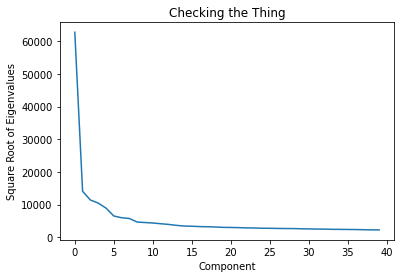

In [26]:
print(S[:10])
plt.plot(np.sqrt(S[:40]))
plt.title("Checking the Thing")
plt.xlabel("Component")
plt.ylabel("Square Root of Eigenvalues")
plt.show()

## Displaying Components

Couldn't find a nice way to display the eigenvectors. Mapping the values from whatever range they are to 0-1 gives you grey smudges which makes sense. Scaling them and then letting pylot try and clip them atleast gives you a look at the interesting shapes, similar to when done with a greyscale image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

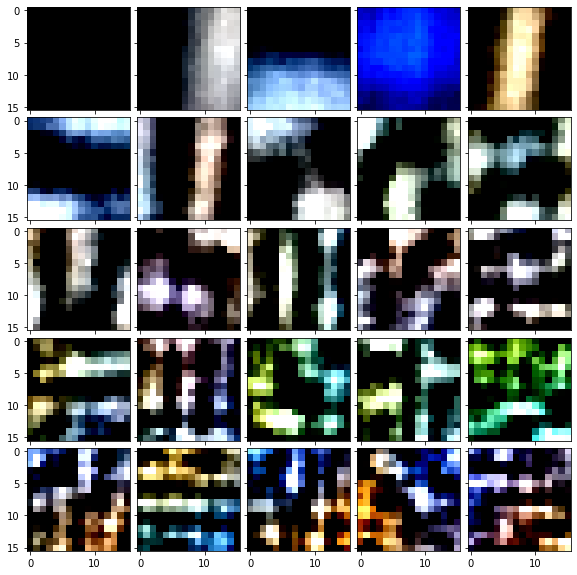

In [31]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,
                 )
components = []
for v in V:
  p =  v * 20.0
  p = p.reshape(16, 16, 3)
  components.append(p)

for ax, im in zip(grid, components):
    ax.imshow(im)

plt.show()

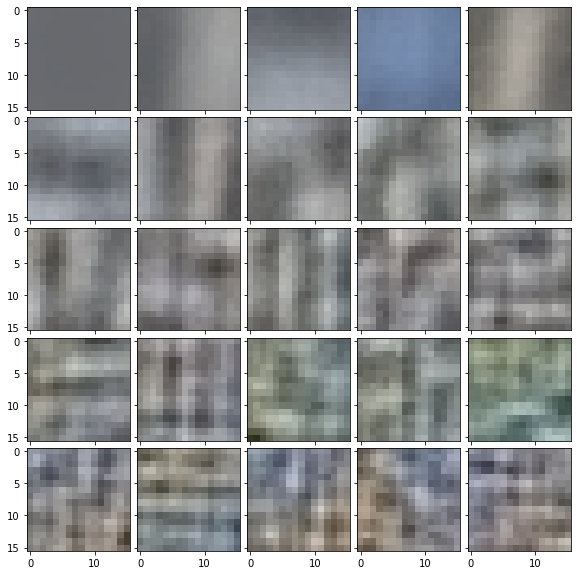

In [33]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,
                 )
es = []
# Remapping values to 0-1
vmin = np.amin(U)
utemp = U - vmin
utemp = utemp/np.amax(utemp)
for v in utemp.T:
  p = v.reshape(16, 16, 3)
  es.append(p)

for ax, im in zip(grid, es):
    ax.imshow(im)

plt.show()

In [34]:
def reconstruct_patch(vs, patch, mean_patch):
  scalars = []
  patch = patch - mean_patch
  for v in vs:
    scalars.append(np.dot(patch, v))
  scalars = np.array(scalars)
  new_patch = mean_patch + np.dot(scalars, vs)
  return new_patch

In [35]:
def reconstruct_patch2(vs, patch, mean_patch):
  new_patch = mean_patch + np.dot(np.dot((patch-mean_patch), vs.T), vs)
  return new_patch

In [36]:
test_patch = reconstruct_patch2(V[:10, :], flat_patches[0,:], flat_mean_vec)
cv2_imshow(test_patch.reshape(16, 16, 3))

In [37]:
def build_new_patches(cs, flat_patches, flat_mean_vec):
  new_patches = []
  for p in flat_patches:
    new_patch = reconstruct_patch2(cs, p, flat_mean_vec)
    #new_patch = reconstruct_patch(pca.components_, p, flat_mean_vec)
    new_patches.append(new_patch.reshape(16, 16, 3))
  new_patches = np.array(new_patches)
  return new_patches

In [38]:
def reconstruct_image(new_patches):
  new_img = np.empty(img.shape)
  i=0
  for x in range(0, 40):
    for y in range(0, 26):
      yp = y * 16
      xp = x * 16
      new_img[yp:yp+16,xp:xp+16, :] = new_patches[i]
      i += 1
  #patches = np.array(patches)
  return new_img

In [42]:
new_patches = build_new_patches(V[:10,:], flat_patches, flat_mean_vec)
k10 = reconstruct_image(new_patches)
new_patches = build_new_patches(V[:100,:], flat_patches, flat_mean_vec)
k100 = reconstruct_image(new_patches)
new_patches = build_new_patches(V[:7,:], flat_patches, flat_mean_vec)
kwhat = reconstruct_image(new_patches)

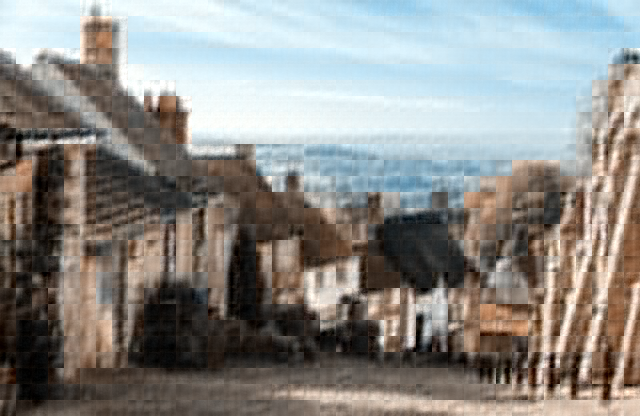

In [44]:
imshow(k10)

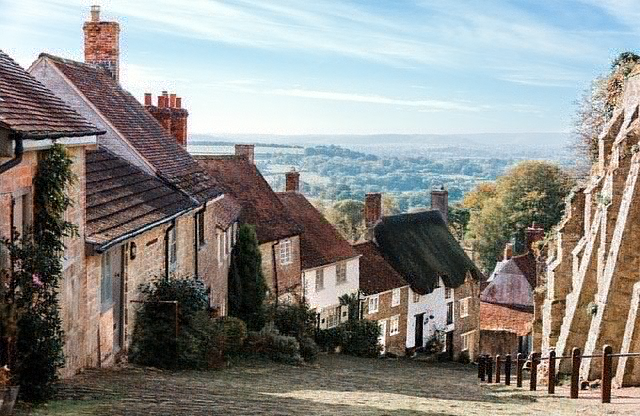

In [45]:
imshow(k100)

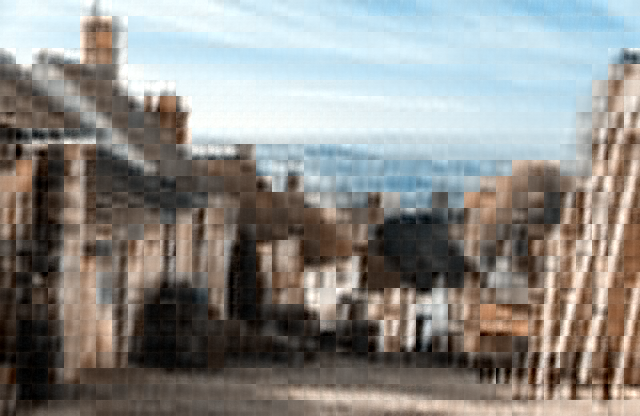

In [43]:
imshow(kwhat)